In [1]:
import sqlalchemy
import sqlite3
import pandas

csvkit does not work on my conda environment and hence I am using sqlalchemy and pandas to complete this assignment. I think it is due to the module ‘collections’ being removed or moved for python version 3.10 and after.

In [2]:
import pandas as pd
from sqlalchemy import create_engine

# Load datasets
# disgenet.csv contains information about gene-disease associations
# disgenet_small.csv is a smaller version of disgenet.csv
# go_human.tsv contains information about gene ontology annotations for humans
df_disgenet = pd.read_csv('disgenet.csv')
df_disgenet_small = pd.read_csv('disgenet_small.csv')
df_go_human = pd.read_csv('go_human.tsv', sep='\t')  # for tsv file

# create a sqlite database
engine = create_engine('sqlite:///mydatabase.db')

# write the DataFrame to sqlite
df_disgenet.to_sql('disgenet', con=engine, if_exists='replace')
df_disgenet_small.to_sql('disgenet_small', con=engine, if_exists='replace')
df_go_human.to_sql('go_human', con=engine, if_exists='replace')

345832

In [3]:
df = pd.read_sql_query("SELECT * FROM disgenet LIMIT 20", engine)
print(df)

    index  gene_id gene_symbol               gene_name  DSI    DPI   
0       0        1        A1BG  alpha-1-B glycoprotein  0.7  0.538  \
1       1        1        A1BG  alpha-1-B glycoprotein  0.7  0.538   
2       2        1        A1BG  alpha-1-B glycoprotein  0.7  0.538   
3       3        1        A1BG  alpha-1-B glycoprotein  0.7  0.538   
4       4        1        A1BG  alpha-1-B glycoprotein  0.7  0.538   
5       5        1        A1BG  alpha-1-B glycoprotein  0.7  0.538   
6       6        1        A1BG  alpha-1-B glycoprotein  0.7  0.538   
7       7        1        A1BG  alpha-1-B glycoprotein  0.7  0.538   
8       8        1        A1BG  alpha-1-B glycoprotein  0.7  0.538   
9       9        1        A1BG  alpha-1-B glycoprotein  0.7  0.538   
10     10        1        A1BG  alpha-1-B glycoprotein  0.7  0.538   
11     11        1        A1BG  alpha-1-B glycoprotein  0.7  0.538   
12     12        1        A1BG  alpha-1-B glycoprotein  0.7  0.538   
13     13        1  

In [4]:
df1 = pd.read_sql_query("SELECT * FROM go_human LIMIT 20", engine)
print(df1)

    index  tax_id  gene_id       go_id evidence     qualifier   
0       0    9606        1  GO:0003674       ND       enables  \
1       1    9606        1  GO:0005576      HDA    located_in   
2       2    9606        1  GO:0005576      IDA    located_in   
3       3    9606        1  GO:0005576      TAS    located_in   
4       4    9606        1  GO:0005615      HDA    located_in   
5       5    9606        1  GO:0005886      IBA  is_active_in   
6       6    9606        1  GO:0008150       ND   involved_in   
7       7    9606        1  GO:0031093      TAS    located_in   
8       8    9606        1  GO:0034774      TAS    located_in   
9       9    9606        1  GO:0062023      HDA    located_in   
10     10    9606        1  GO:0070062      HDA    located_in   
11     11    9606        1  GO:0072562      HDA    located_in   
12     12    9606        1  GO:1904813      TAS    located_in   
13     13    9606        2  GO:0001553      IEA   involved_in   
14     14    9606        

Research question 1
# This query gets the number of gene-disease associations and publications by year from 1960 onwards
# It also calculates the cumulative counts of associations and publications

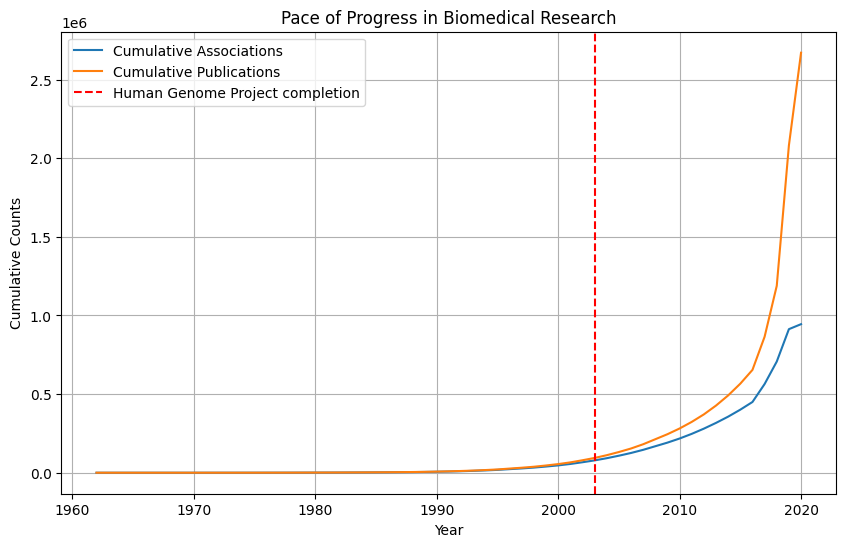

In [5]:
df_cumulative = pd.read_sql_query("""
    SELECT last_year AS year,
           COUNT(*) AS num_associations,
           SUM(num_pubs) AS num_publications
    FROM disgenet
    WHERE last_year >= 1960
    GROUP BY last_year
    ORDER BY last_year
""", engine)

df_cumulative['cumulative_associations'] = df_cumulative['num_associations'].cumsum()
df_cumulative['cumulative_publications'] = df_cumulative['num_publications'].cumsum()

# Plotting cumulative counts of gene-disease associations and publications over time
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df_cumulative['year'], df_cumulative['cumulative_associations'], label='Cumulative Associations')
plt.plot(df_cumulative['year'], df_cumulative['cumulative_publications'], label='Cumulative Publications')
plt.axvline(2003, color='red', linestyle='--', label='Human Genome Project completion')  # Completion of Human Genome Project
plt.xlabel('Year')
plt.ylabel('Cumulative Counts')
plt.title('Pace of Progress in Biomedical Research')
plt.legend()
plt.grid()
plt.show()


Research Question 2
# Query to get the top 10 genes and diseases by the number of gene-disease associations

In [6]:
# Top 10 genes
df_top_genes = pd.read_sql_query("""
    SELECT gene_symbol, gene_name, COUNT(*) AS num_associations, SUM(num_pubs) AS num_publications
    FROM disgenet
    GROUP BY gene_symbol, gene_name
    ORDER BY num_associations DESC
    LIMIT 10
""", engine)

print(df_top_genes)


# Top 10 diseases excluding disease_type = ‘group’
df_top_diseases = pd.read_sql_query("""
    SELECT disease_name, COUNT(*) AS num_associations, SUM(num_pubs) AS num_publications
    FROM disgenet
    WHERE disease_type != 'group'
    GROUP BY disease_name
    ORDER BY num_associations DESC
    LIMIT 10
""", engine)


print(df_top_diseases)

  gene_symbol                                          gene_name   
0         TNF                              tumor necrosis factor  \
1        TP53                                  tumor protein p53   
2         IL6                                      interleukin 6   
3       VEGFA               vascular endothelial growth factor A   
4        IL1B                                 interleukin 1 beta   
5        IL10                                     interleukin 10   
6       TGFB1                  transforming growth factor beta 1   
7        IFNG                                   interferon gamma   
8      PIK3CA  phosphatidylinositol-4,5-bisphosphate 3-kinase...   
9         CRP                                 C-reactive protein   

   num_associations  num_publications  
0              2724             21889  
1              2494             49257  
2              2367             15512  
3              1899             18185  
4              1801              9276  
5          

The common theme among the top genes and diseases is their association with various forms of cancer. Many of these genes play important roles in tumor growth, metastasis, and inflammation, which are key processes in cancer development and progression. The high number of associations and publications related to these genes and diseases underscores the significant research focus on understanding and addressing cancer-related issues.

Research Question 3
# Query to get the degree of each gene and disease (i.e., the number of associations they have)

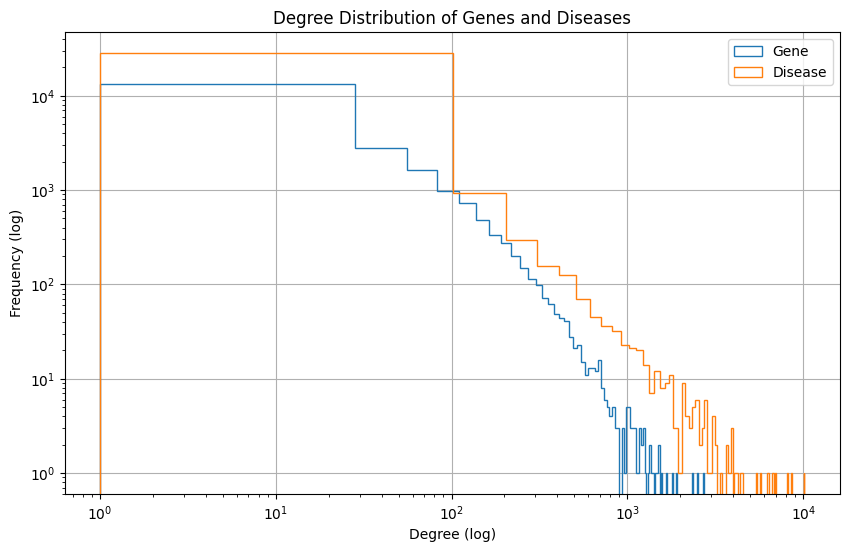

In [7]:
# Getting degree of each gene and disease
df_gene_degree = pd.read_sql_query("SELECT gene_symbol, COUNT(*) as degree FROM disgenet GROUP BY gene_symbol", engine)
df_disease_degree = pd.read_sql_query("SELECT disease_name, COUNT(*) as degree FROM disgenet GROUP BY disease_name", engine)

# Plotting degree distributions of genes and diseases on log-log scale
# We use a log-log scale because degree distributions often follow power laws, and a log-log scale makes this clearer
plt.figure(figsize=(10, 6))
plt.hist(df_gene_degree['degree'], bins=100, log=True, histtype='step', label='Gene')
plt.hist(df_disease_degree['degree'], bins=100, log=True, histtype='step', label='Disease')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree (log)')
plt.ylabel('Frequency (log)')
plt.title('Degree Distribution of Genes and Diseases')
plt.legend()
plt.grid()
plt.show()


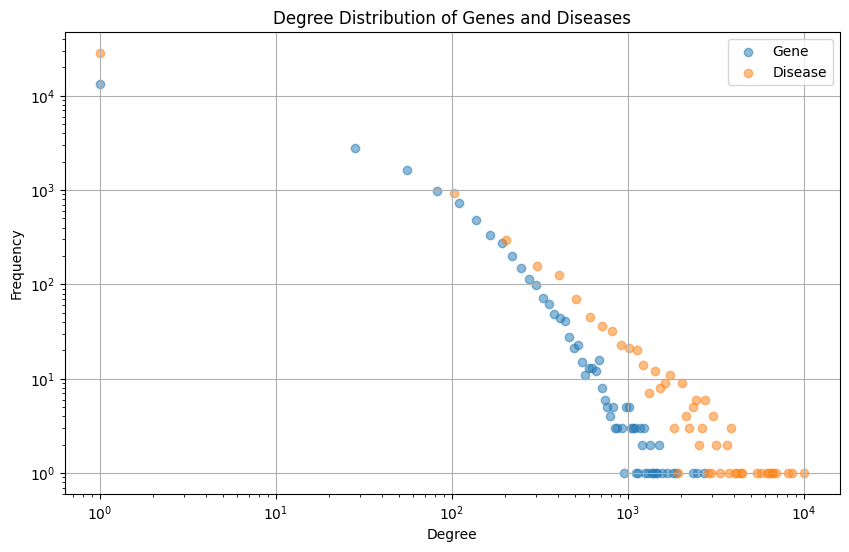

In [8]:
import numpy as np

# Getting degree of each gene and disease
df_gene_degree = pd.read_sql_query("SELECT gene_symbol, COUNT(*) as degree FROM disgenet GROUP BY gene_symbol", engine)
df_disease_degree = pd.read_sql_query("SELECT disease_name, COUNT(*) as degree FROM disgenet GROUP BY disease_name", engine)

# Count and bins for genes
gene_counts, gene_bins = np.histogram(df_gene_degree['degree'], bins=100)

# Count and bins for diseases
disease_counts, disease_bins = np.histogram(df_disease_degree['degree'], bins=100)

# Plotting
plt.figure(figsize=(10, 6))

# Plot gene scatter
plt.scatter(gene_bins[:-1], gene_counts, label='Gene', alpha=0.5)

# Plot disease scatter
plt.scatter(disease_bins[:-1], disease_counts, label='Disease', alpha=0.5)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution of Genes and Diseases')
plt.legend()
plt.grid()
plt.show()


Research question 4

In [9]:
df_alzheimer_genes = pd.read_sql_query("""
    SELECT gene_symbol, gene_name, EI, DSI, DPI, num_pubs
    FROM disgenet
    WHERE disease_name = 'Alzheimer''s Disease' AND EI >= 0.667 AND num_pubs >= 11
""", engine)

# Let's show the top 10 genes with the most publications
df_alzheimer_genes.sort_values('num_pubs', ascending=False).head(10)


,gene_symbol,gene_name,EI,DSI,DPI,num_pubs
23,APOE,apolipoprotein E,0.9461,0.338,0.962,3088
24,APP,amyloid beta precursor protein,0.9810,0.422,0.846,2615
141,MAPT,microtubule associated protein tau,0.9900,0.445,0.923,1003
186,PSEN1,presenilin 1,0.9707,0.469,0.846,703
271,BACE1,beta-secretase 1,0.9852,0.559,0.769,490
4,ACHE,acetylcholinesterase (Cartwright blood group),0.9845,0.445,0.885,390
27,BCHE,butyrylcholinesterase,0.9621,0.447,0.923,348
62,CSF2,colony stimulating factor 2,0.9660,0.330,0.962,294
130,LAMC2,laminin subunit gamma 2,0.9654,0.389,0.923,289
29,BDNF,brain derived neurotrophic factor,0.9582,0.345,0.923,242


Research Question 5

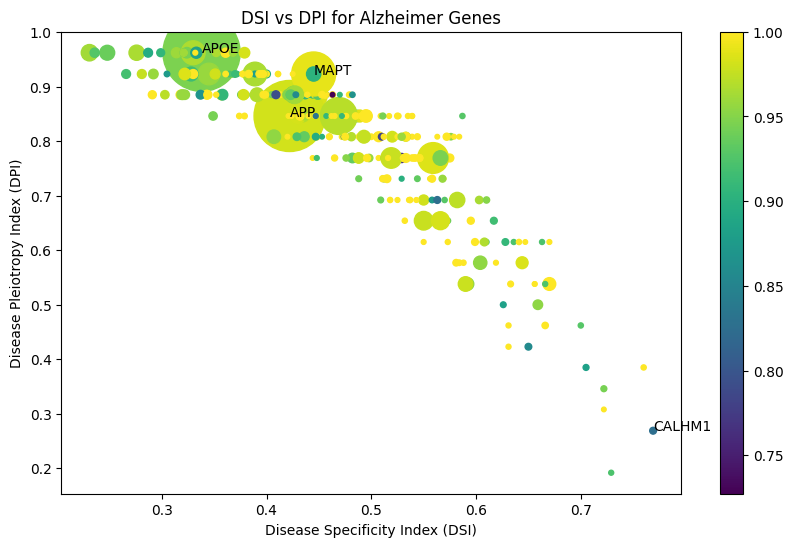

In [10]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_alzheimer_genes['DSI'], df_alzheimer_genes['DPI'], c=df_alzheimer_genes['EI'],
                      s=df_alzheimer_genes['num_pubs'], cmap='viridis')
plt.xlabel('Disease Specificity Index (DSI)')
plt.ylabel('Disease Pleiotropy Index (DPI)')
plt.title('DSI vs DPI for Alzheimer Genes')
plt.colorbar(scatter)

# Annotate with gene symbols
for gene in ['APOE', 'APP', 'MAPT', 'CALHM1']:
    gene_data = df_alzheimer_genes[df_alzheimer_genes['gene_symbol'] == gene].iloc[0]
    plt.text(gene_data['DSI'], gene_data['DPI'], gene)

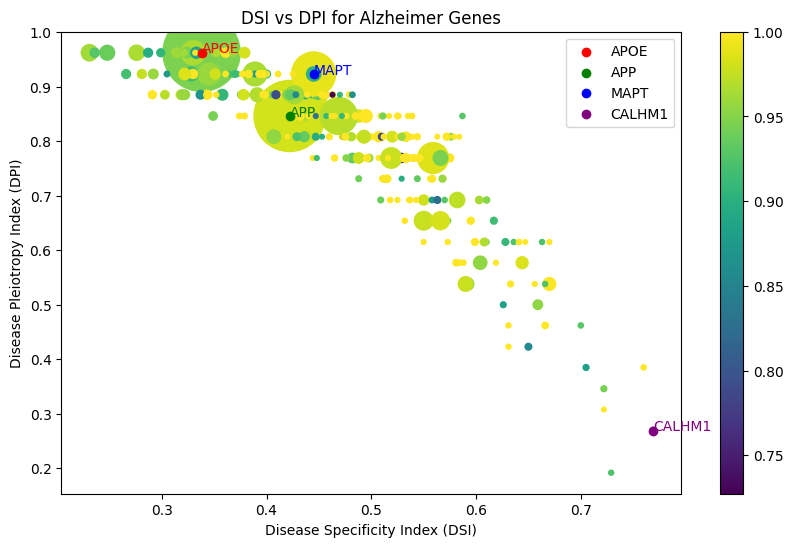

In [11]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_alzheimer_genes['DSI'], df_alzheimer_genes['DPI'], c=df_alzheimer_genes['EI'],
                      s=df_alzheimer_genes['num_pubs'], cmap='viridis', label=None)
plt.xlabel('Disease Specificity Index (DSI)')
plt.ylabel('Disease Pleiotropy Index (DPI)')
plt.title('DSI vs DPI for Alzheimer Genes')
plt.colorbar(scatter)

# Create a legend for gene symbols
gene_symbols = ['APOE', 'APP', 'MAPT', 'CALHM1']
colors = ['red', 'green', 'blue', 'purple']  # Adjust the colors to your liking

for gene, color in zip(gene_symbols, colors):
    gene_data = df_alzheimer_genes[df_alzheimer_genes['gene_symbol'] == gene].iloc[0]
    plt.scatter(gene_data['DSI'], gene_data['DPI'], color=color, label=gene)  # this line is added for the legend
    plt.annotate(gene, (gene_data['DSI'], gene_data['DPI']), color=color)

plt.legend()


Research Question 6

In [12]:
df_go_process = pd.read_sql_query("""
    SELECT DISTINCT go_id, qualifier, go_term, COUNT(*) AS num_genes
    FROM go_human
    WHERE category = 'Process' AND gene_id IN (
        SELECT gene_id FROM disgenet WHERE disease_name = 'Alzheimer''s Disease' AND EI >= 0.667 AND num_pubs >= 11
    )
    GROUP BY go_id, qualifier, go_term
    ORDER BY num_genes DESC
""", engine)

print(df_go_process)

           go_id    qualifier   
0     GO:0010628  involved_in  \
1     GO:0045944  involved_in   
2     GO:0006468  involved_in   
3     GO:0007165  involved_in   
4     GO:0043066  involved_in   
...          ...          ...   
3841  GO:2001242  involved_in   
3842  GO:2001260  involved_in   
3843  GO:2001268  involved_in   
3844  GO:2001272  involved_in   
3845  GO:2001301  involved_in   

                                                go_term  num_genes  
0                positive regulation of gene expression         74  
1     positive regulation of transcription by RNA po...         67  
2                               protein phosphorylation         55  
3                                   signal transduction         55  
4              negative regulation of apoptotic process         45  
...                                                 ...        ...  
3841  regulation of intrinsic apoptotic signaling pa...          1  
3842  regulation of semaphorin-plexin signaling pat

In [13]:
df_go_process = pd.read_sql_query("""
    SELECT go_id, qualifier, go_term, COUNT(DISTINCT gene_id) AS num_genes
    FROM go_human
    WHERE category = 'Process' AND gene_id IN (
        SELECT gene_id FROM disgenet WHERE disease_name = 'Alzheimer''s Disease' AND EI >= 0.667 AND num_pubs >= 11
    )
    GROUP BY go_id, qualifier, go_term
    ORDER BY num_genes DESC
""", engine)

print(df_go_process)


           go_id    qualifier   
0     GO:0007165  involved_in  \
1     GO:0010628  involved_in   
2     GO:0045944  involved_in   
3     GO:0043066  involved_in   
4     GO:0006468  involved_in   
...          ...          ...   
3841  GO:2001260  involved_in   
3842  GO:2001268  involved_in   
3843  GO:2001269  involved_in   
3844  GO:2001272  involved_in   
3845  GO:2001301  involved_in   

                                                go_term  num_genes  
0                                   signal transduction         52  
1                positive regulation of gene expression         46  
2     positive regulation of transcription by RNA po...         42  
3              negative regulation of apoptotic process         38  
4                               protein phosphorylation         34  
...                                                 ...        ...  
3841  regulation of semaphorin-plexin signaling pathway          1  
3842  negative regulation of cysteine-type endopept

Research Question 7

In [14]:
df_associated_diseases = pd.read_sql_query("""
    SELECT disease_name, COUNT(*) AS num_associated_genes, SUM(num_pubs) AS num_publications
    FROM disgenet
    WHERE gene_id IN (
        SELECT gene_id FROM disgenet WHERE disease_name = 'Alzheimer''s Disease' AND EI >= 0.667 AND num_pubs >= 11
    ) AND disease_type != 'group' AND EI >= 0.667 AND num_pubs >= 11
    GROUP BY disease_name
    ORDER BY num_associated_genes DESC
    LIMIT 10
""", engine)

print(df_associated_diseases.head(11))

                               disease_name  num_associated_genes   
0                       Alzheimer's Disease                   314  \
1              Malignant neoplasm of breast                   124   
2                          Breast Carcinoma                   123   
3                       Neoplasm Metastasis                   109   
4                       Tumor Cell Invasion                   101   
5                           Liver carcinoma                    97   
6                            Carcinogenesis                    95   
7                         Parkinson Disease                    81   
8                           Atherosclerosis                    78   
9  Diabetes Mellitus, Non-Insulin-Dependent                    77   

   num_publications  
0             18581  
1             14530  
2             14015  
3              6748  
4              8004  
5              5481  
6              7142  
7              6520  
8              3961  
9              6094 

Research Question 8

In [15]:
query = """
    SELECT gene_symbol, disease_name, num_pubs
    FROM disgenet
    WHERE disease_type != 'group' AND gene_id IN (
        SELECT gene_id FROM disgenet WHERE disease_name = 'Alzheimer''s Disease' AND EI >= 0.667 AND num_pubs >= 11
    )
    AND disease_name IN (
        SELECT disease_name FROM (
            SELECT disease_name, COUNT(DISTINCT gene_id) AS num_genes
            FROM disgenet
            WHERE disease_type != 'group' AND gene_id IN (
                SELECT gene_id FROM disgenet WHERE disease_name = 'Alzheimer''s Disease' AND EI >= 0.667 AND num_pubs >= 11
            )
            GROUP BY disease_name
            ORDER BY num_genes DESC
            LIMIT 10
        )
    )
    ORDER BY num_pubs DESC
    LIMIT 200
"""

df_network = pd.read_sql_query(query, engine)


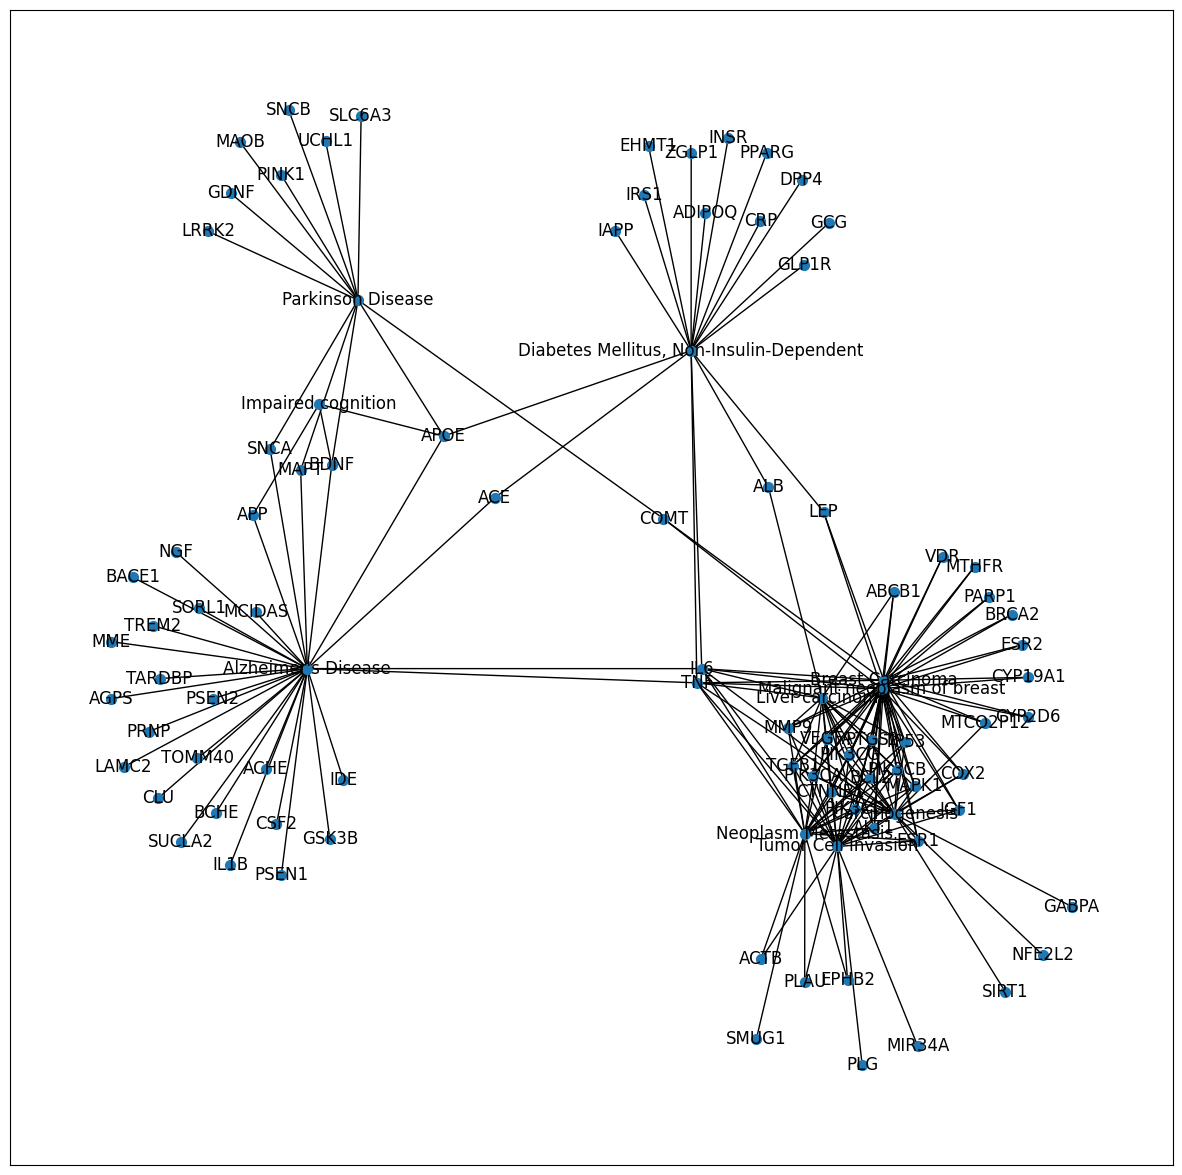

In [16]:
import networkx as nx

plt.figure(figsize=(15, 15), dpi=100)
G = nx.from_pandas_edgelist(df_network, 'gene_symbol', 'disease_name', create_using=nx.Graph())
nx.draw_networkx(G, with_labels=True, node_size=50)


Open research initiative:
Which are the genes with the highest number of publications (num_pubs)? Are they also the genes with high disease specificity (DSI)? Which genes with the highest number of publications (num_pubs) also have high disease specificity (DSI) and what biological processes (GO terms) are these genes involved in?

For more context: 
The Disease Specificity Index (DSI) ranges from 0 to 1. A DSI close to 1 indicates that a gene is associated with a small number of diseases, suggesting a more specific role for the gene. Conversely, a DSI close to 0 indicates that a gene is associated with many diseases, suggesting a more general role for the gene.

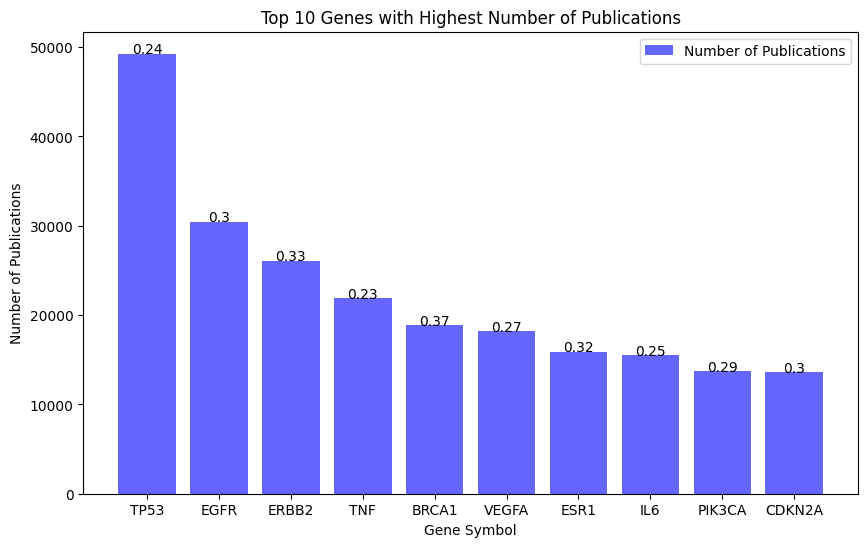

In [17]:
import matplotlib.pyplot as plt

# Read all data from disgenet
df_disgenet = pd.read_sql_query("SELECT * FROM disgenet", engine)

# Group by gene_id and gene_symbol to get sum of num_pubs and average of DSI
# 'num_pubs' represents the number of publications associated with a gene
# 'DSI' (Disease Specificity Index) measures the specificity of a gene to diseases
grouped_df = df_disgenet.groupby(['gene_id', 'gene_symbol']).agg({'num_pubs':'sum', 'DSI':'mean'}).reset_index()

# Sort by num_pubs in descending order and select top 10
top_10_genes = grouped_df.sort_values('num_pubs', ascending=False).head(10)

# Make a bar plot
plt.figure(figsize=(10,6))
plt.bar(top_10_genes['gene_symbol'], top_10_genes['num_pubs'], color='blue', alpha=0.6, label='Number of Publications')
plt.xlabel('Gene Symbol')
plt.ylabel('Number of Publications')
plt.title('Top 10 Genes with Highest Number of Publications')
plt.legend()

# Add DSI values as text on the bars
for i in range(top_10_genes.shape[0]):
    plt.text(i, top_10_genes.iloc[i]['num_pubs'], round(top_10_genes.iloc[i]['DSI'], 2), ha='center')

plt.show()


When we group the data by gene and calculate the mean (average) DSI, we are trying to get an overall sense of the specificity of each gene across all the diseases it is associated with. By averaging the DSI values, we can interpret the result as the "average specificity" of the gene to diseases. This will help us understand, on average, whether the gene tends to be more specific or more general in its disease associations.

In [18]:
print(top_10_genes)

      gene_id gene_symbol  num_pubs    DSI
5216     7157        TP53     49257  0.236
1429     1956        EGFR     30435  0.295
1516     2064       ERBB2     26071  0.328
5190     7124         TNF     21889  0.231
493       672       BRCA1     18868  0.367
5408     7422       VEGFA     18185  0.266
1536     2099        ESR1     15881  0.324
2573     3569         IL6     15512  0.248
3786     5290      PIK3CA     13746  0.292
774      1029      CDKN2A     13573  0.300


In [19]:
# Query to get diseases with highest DSI
query = """
SELECT disease_name, DSI 
FROM disgenet 
ORDER BY DSI DESC 
LIMIT 20
"""

# Execute the query and store the result in a DataFrame
df_diseases_highest_DSI = pd.read_sql_query(query, engine)

# Print the DataFrame
print(df_diseases_highest_DSI)


                                  disease_name  DSI
0            Severe Acute Respiratory Syndrome  1.0
1              Alcoholic Intoxication, Chronic  1.0
2                         Adrenoleukodystrophy  1.0
3                             Bipolar Disorder  1.0
4                              Body mass index  1.0
5                              Liver carcinoma  1.0
6                          Neoplasm Metastasis  1.0
7                          Tumor Cell Invasion  1.0
8                                  Hepatitis C  1.0
9                    Oropharyngeal candidiasis  1.0
10                          Trisomy X syndrome  1.0
11  Arrhythmogenic Right Ventricular Dysplasia  1.0
12                           Parkinson Disease  1.0
13                          Hurthle Cell Tumor  1.0
14                            Burkitt Lymphoma  1.0
15                   Blood Protein Measurement  1.0
16               Complement deficiency disease  1.0
17               Liver Cirrhosis, Experimental  1.0
18          

In [20]:
print(grouped_df)

         gene_id gene_symbol  num_pubs    DSI
0              1        A1BG        33  0.700
1              2         A2M       256  0.529
2              3       A2MP1         1    NaN
3              9        NAT1       463  0.536
4             10        NAT2      1598  0.451
...          ...         ...       ...    ...
21666  115482722       H3P33        34  0.736
21667  115482723       H3P40       329  0.506
21668  115561815    LNC-LBCS         3  0.890
21669  115804232      CEROX1         1    NaN
21670  115891964    MIR223HG         4  0.861

[21671 rows x 4 columns]


     gene_id gene_symbol  num_pubs    DSI   index  tax_id       go_id   
0       7157        TP53     49257  0.236  144302    9606  GO:0000122  \
1       7157        TP53     49257  0.236  144303    9606  GO:0000122   
2       7157        TP53     49257  0.236  144304    9606  GO:0000423   
3       7157        TP53     49257  0.236  144320    9606  GO:0001701   
4       7157        TP53     49257  0.236  144321    9606  GO:0001756   
..       ...         ...       ...    ...     ...     ...         ...   
904     1029      CDKN2A     13573  0.300   24873    9606  GO:0090398   
905     1029      CDKN2A     13573  0.300   24874    9606  GO:0090399   
906     1029      CDKN2A     13573  0.300   24875    9606  GO:2000045   
907     1029      CDKN2A     13573  0.300   24876    9606  GO:2000045   
908     1029      CDKN2A     13573  0.300   24877    9606  GO:2000111   

    evidence    qualifier                                            go_term   
0        IDA  involved_in  negative regulat

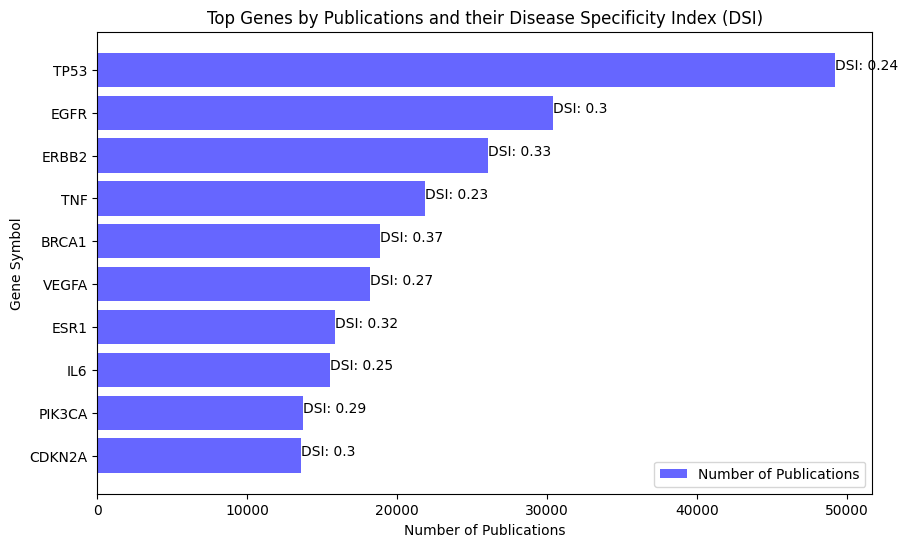

In [21]:
# Read all data from go_human
df_go_human = pd.read_sql_query("SELECT * FROM go_human WHERE category = 'Process'", engine)

# Merge the top_10_genes with df_go_human to get go_terms
merged_df = pd.merge(top_10_genes, df_go_human, how='inner', on=['gene_id'])

# Display the merged_df
print(merged_df)

# Now let's group the data by gene_symbol, num_pubs, DSI and get all associated go_terms
grouped_df = merged_df.groupby(['gene_symbol', 'num_pubs', 'DSI'])['go_term'].apply(lambda x: ', '.join(x)).reset_index()

# Sort the data by num_pubs in descending order
grouped_df = grouped_df.sort_values('num_pubs', ascending=False)

print(grouped_df)

# For visualization, we will create a horizontal bar plot with number of publications and DSI
plt.figure(figsize=(10,6))

# Create a barh plot for 'num_pubs'
plt.barh(grouped_df['gene_symbol'], grouped_df['num_pubs'], color='blue', alpha=0.6, label='Number of Publications')

# Invert the y-axis to display the gene with highest num_pubs at top
plt.gca().invert_yaxis()

# Labeling
plt.xlabel('Number of Publications')
plt.ylabel('Gene Symbol')
plt.title('Top Genes by Publications and their Disease Specificity Index (DSI)')
plt.legend()

# Add DSI values as text besides the bars
for i in range(grouped_df.shape[0]):
    plt.text(grouped_df.iloc[i]['num_pubs'], i, 'DSI: ' + str(round(grouped_df.iloc[i]['DSI'], 2)))

plt.show()

# This will create a plot with genes on y-axis and number of publications on x-axis. Each bar will also have a DSI value displayed besides it.

First, the genes with the highest number of publications (num_pubs) are not necessarily the ones with the highest Disease Specificity Index (DSI). This makes sense because genes that are associated with a high number of diseases (and therefore have a low DSI) might be studied more broadly and therefore appear in more publications. Conversely, genes that are associated with fewer diseases (and therefore have a high DSI) might be studied in a more focused manner and therefore appear in fewer publications.

Looking at the top 10 genes with the highest number of publications, we can see that the gene TP53, which is known to be a crucial regulator of the cell cycle and thus functions as a tumor suppressor, tops the list. It has a DSI of 0.236, indicating it has a relatively broad role, as it is associated with several diseases.

The gene BRCA1, often associated with breast and ovarian cancer when mutated, has a higher DSI of 0.367 and fewer publications than TP53, suggesting it might be more disease-specific.

From the provided GO (Gene Ontology) terms, we can infer the biological processes these genes are involved in. For example, TP53 is involved in the negative regulation of transcription by RNA polymerase, EGFR is involved in the MAPK cascade, cell morphogenesis, ossification, among other processes.

To summarize, while there's no direct correlation between the number of publications and disease specificity (DSI), both are important indicators of a gene's role and significance in disease processes. Additionally, the GO terms provide useful insights into the biological roles of these genes.

In [22]:
query = """
SELECT disgenet_small.gene_symbol, disgenet_small.num_pubs, disgenet_small.DSI, GROUP_CONCAT(go_human.go_term, ', ') as go_terms
FROM disgenet_small
JOIN go_human ON disgenet_small.gene_id = go_human.gene_id
GROUP BY disgenet_small.gene_symbol
"""
df_combined = pd.read_sql_query(query, engine)


In [23]:
df_combined_sorted = df_combined.sort_values(by='num_pubs', ascending=False)

In [24]:
# Save the sorted DataFrame to a CSV file
df_combined_sorted.to_csv('combined_sorted.csv', index=False)